In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from lane_finder.lane_detector import LaneDetector

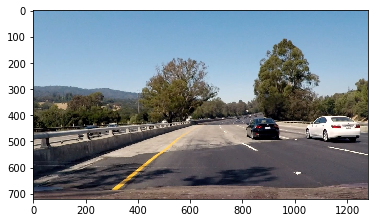

In [20]:
test_road_img = mpimg.imread('./test_images/test4.jpg')
plt.imshow(test_road_img)

#### Create a LaneDetector instance

In [ ]:
detector = LaneDetector()

#### Show camera calibration images

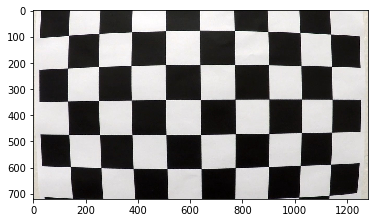

In [3]:
img = mpimg.imread('./camera_cal/calibration1.jpg')
plt.imshow(img)

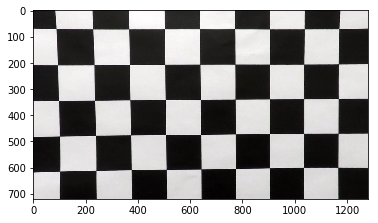

In [4]:
plt.imshow(detector.camera.correct_distortion(img))


#### Call single lane detection pipeline method on the road image

In [5]:
detector.detect_lane(test_road_img);

#### Access various intermediate pipeline stage images and attributes for study

In [6]:
combined = detector.binary_thresholder.combined
combined.shape

(720, 1280)

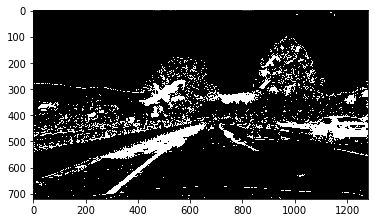

In [7]:
plt.imshow(combined, 'gray')

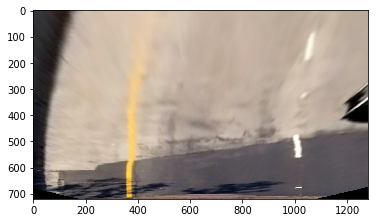

In [8]:
plt.imshow(detector.warped_corrected)

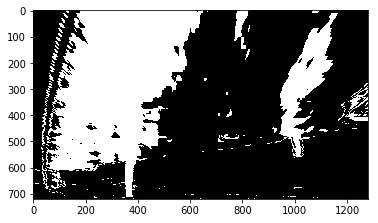

In [9]:
warped = detector.perspective_transformer.warped
plt.imshow(warped, 'gray')

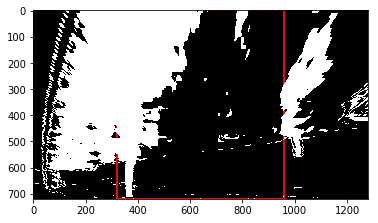

In [10]:
detector.visualizer.draw_polygon(detector.perspective_transformer.warped,
                                 detector.perspective_transformer.dst_default)
plt.imshow(detector.visualizer.visualized, 'gray')

In [11]:
detector.lane_lines.left_fit

array([ 8.77357814e-05, -2.46612989e-02,  3.31604395e+02])

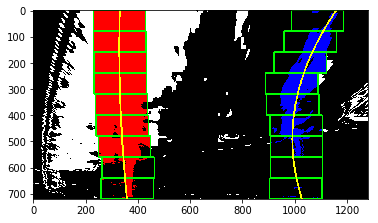

In [12]:
windows = detector.visualizer.visualize_detected_lanes(warped, detector.lane_lines)
plt.imshow(windows)

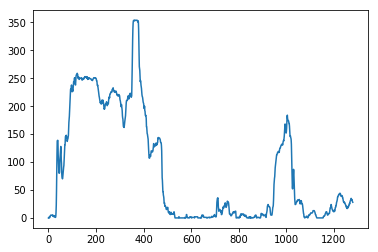

In [13]:
plt.plot(detector.lane_lines.histogram)

In [14]:
detector.lane_curve_rads

[1872.2984977762214, 235.17667486189782]

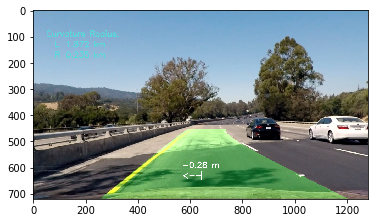

In [15]:
plt.imshow(detector.result)

In [16]:
detector.visualizer.save_image(detector.result, "lane_marked.jpg")

Saving lane_marked.jpg


### Run video clip through refactored pipeline

In [17]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [18]:
ln_dtr = LaneDetector()

project_output = './output_videos/refactored_output.mp4'

clip1 = VideoFileClip("./test_videos/project_video.mp4")
proj_clip = clip1.fl_image(ln_dtr.detect_lane)
%time proj_clip.write_videofile(project_output, audio=False)

t:   0%|          | 0/1260 [00:00<?, ?it/s, now=None]

Moviepy - Building video ./output_videos/refactored_output.mp4.
Moviepy - Writing video ./output_videos/refactored_output.mp4



Moviepy - Done !
Moviepy - video ready ./output_videos/refactored_output.mp4
CPU times: user 41min 52s, sys: 39.2 s, total: 42min 32s
Wall time: 3min 42s


In [19]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format('./output_videos/refactored_output.mp4'))